
Forecasting Timeseries Data Using Facebook FbProphet

Steps Required With FbProphet

Introduction And Installation
Data Preprocessing With Time Seires
Model Fitting
Obtaining The Forecasts
Plotting The Forecasts
Cross Validation
Computing Performance Metrics
Visualize the Performance MEtrics
Conclusions

In [66]:
##!pip install pystan
##!pip install prophet

import pandas as pd
import prophet
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [54]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [55]:
df.drop(168,axis=0,inplace=True)

In [56]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [68]:
df.columns = ["ds", "y"]

In [69]:
df.plot()

<Axes: >

In [58]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [70]:
df['ds']=pd.to_datetime(df['ds'])

In [60]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [63]:
df['y'].plot()

<Axes: >

In [64]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [65]:
df['y'].plot()

<Axes: >

In [72]:
from prophet import Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

In [73]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [74]:
### intiialize the Model
model=Prophet()
model.fit(df)

17:58:09 - cmdstanpy - INFO - Chain [1] start processing
17:58:12 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
model

In [76]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [77]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [78]:
#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [79]:
### Prediction
prediction=model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.936057,576.562401,597.696220,606.936057,606.936057,-20.121091,-20.121091,-20.121091,-20.121091,-20.121091,-20.121091,0.0,0.0,0.0,586.814966
1,1962-02-01,608.648457,535.445452,555.429114,608.648457,608.648457,-62.542349,-62.542349,-62.542349,-62.542349,-62.542349,-62.542349,0.0,0.0,0.0,546.106109
2,1962-03-01,610.195141,631.693943,651.291605,610.195141,610.195141,31.406679,31.406679,31.406679,31.406679,31.406679,31.406679,0.0,0.0,0.0,641.601820
3,1962-04-01,611.907542,648.687380,668.456190,611.907542,611.907542,46.736151,46.736151,46.736151,46.736151,46.736151,46.736151,0.0,0.0,0.0,658.643693
4,1962-05-01,613.564703,711.863585,731.519087,613.564703,613.564703,108.071976,108.071976,108.071976,108.071976,108.071976,108.071976,0.0,0.0,0.0,721.636679


In [80]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.374657,804.389270,826.884263
529,1976-11-27,818.550964,807.468450,829.911933
530,1976-11-28,821.901313,810.316610,832.887091
531,1976-11-29,825.363633,814.063067,836.060451
532,1976-11-30,828.868853,818.492014,839.530292


In [81]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.814966,576.562401,597.696220
1,1962-02-01,546.106109,535.445452,555.429114
2,1962-03-01,641.601820,631.693943,651.291605
3,1962-04-01,658.643693,648.687380,668.456190
4,1962-05-01,721.636679,711.863585,731.519087


Plotting the Forecasts
Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.


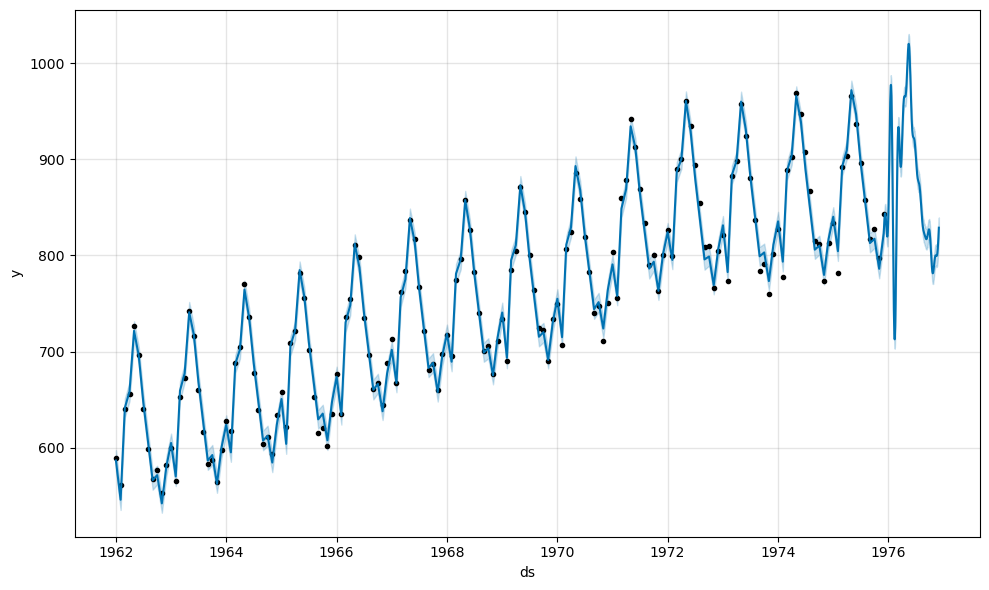

In [82]:
#### plot the predicted projection
model.plot(prediction)

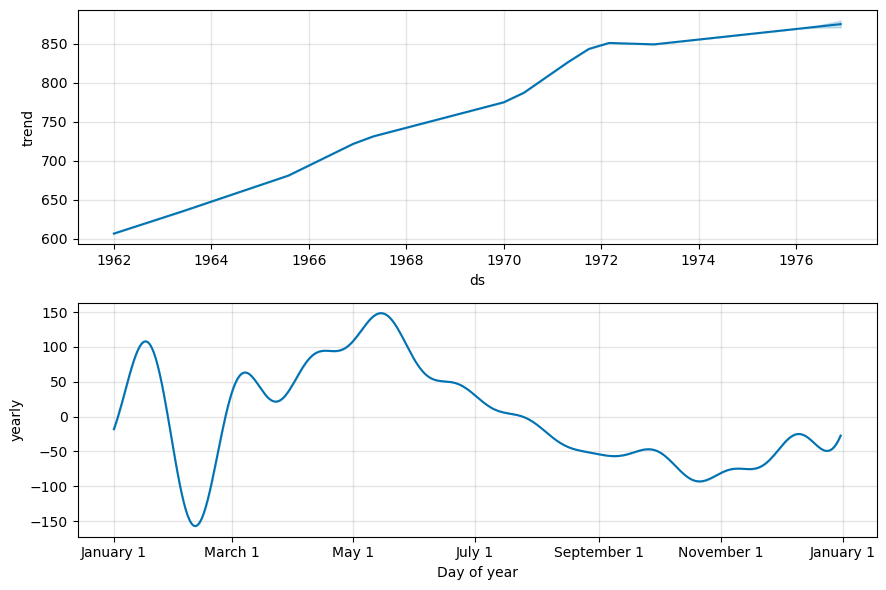

In [83]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

Cross Validation
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

horizon the forecast horizon
initial the size of the initial training period
period the spacing between cutoff dates

In [84]:
df.shape

(168, 2)

In [86]:
from prophet.diagnostics import cross_validation
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

  0%|          | 0/21 [00:00<?, ?it/s]

17:59:07 - cmdstanpy - INFO - Chain [1] start processing
17:59:50 - cmdstanpy - INFO - Chain [1] done processing
17:59:51 - cmdstanpy - INFO - Chain [1] start processing
17:59:51 - cmdstanpy - INFO - Chain [1] done processing
17:59:52 - cmdstanpy - INFO - Chain [1] start processing
17:59:53 - cmdstanpy - INFO - Chain [1] done processing
17:59:53 - cmdstanpy - INFO - Chain [1] start processing
17:59:54 - cmdstanpy - INFO - Chain [1] done processing
17:59:54 - cmdstanpy - INFO - Chain [1] start processing
17:59:55 - cmdstanpy - INFO - Chain [1] done processing
17:59:56 - cmdstanpy - INFO - Chain [1] start processing
17:59:56 - cmdstanpy - INFO - Chain [1] done processing
17:59:57 - cmdstanpy - INFO - Chain [1] start processing
17:59:58 - cmdstanpy - INFO - Chain [1] done processing
17:59:58 - cmdstanpy - INFO - Chain [1] start processing
17:59:59 - cmdstanpy - INFO - Chain [1] done processing
18:00:00 - cmdstanpy - INFO - Chain [1] start processing
18:00:01 - cmdstanpy - INFO - Chain [1]

In [87]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [88]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,624.491546,621.998103,627.302011,622.0,1965-01-22
1,1965-03-01,697.230329,688.933885,705.722363,709.0,1965-01-22
2,1965-04-01,716.197443,700.138622,732.295908,722.0,1965-01-22
3,1965-05-01,789.442602,763.369663,815.452253,782.0,1965-01-22
4,1965-06-01,756.942512,720.906524,793.490662,756.0,1965-01-22


Obtaining the Performance Metrics
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.


In [90]:
from prophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,257.914063,16.059703,12.576294,0.016141,0.014527,0.016133,0.36
1,41 days,255.845121,15.995159,12.492324,0.016070,0.014527,0.016061,0.36
2,42 days,271.327292,16.472015,12.968456,0.016729,0.014907,0.016730,0.36
3,43 days,273.281641,16.531232,13.210193,0.017113,0.014907,0.017118,0.34
4,46 days,259.785384,16.117859,12.964769,0.016792,0.014907,0.016781,0.32


In [91]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\mahav\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
